In [1]:
import os
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

In [2]:
net = cv.dnn.readNet('yolov5s.onnx')
classes = []
with open('coco.names', 'r') as f:
    classes = f.read().splitlines()

In [3]:
layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]

In [4]:
colors = np.random.uniform(0, 255, size=(len(classes), 3))

In [5]:
img_path = os.path.join(os.pardir, os.pardir, os.pardir, 'img', 'classification', 'dog.jpg')
img = cv.imread(img_path)
img = cv.resize(img, None, fx=0.4, fy=0.3)

In [6]:
height, width, channels = img.shape
blob = cv.dnn.blobFromImage(img, 1 / 255.0, (640, 640), (0, 0, 0), True, crop=False)

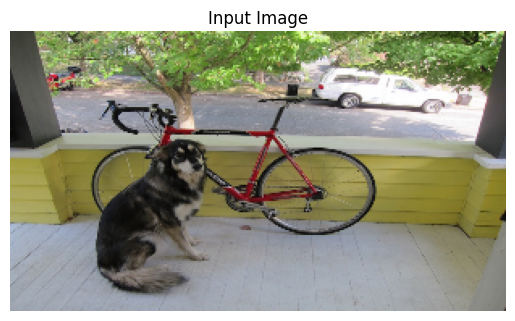

In [7]:
plt.figure()
plt.title('Input Image')
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

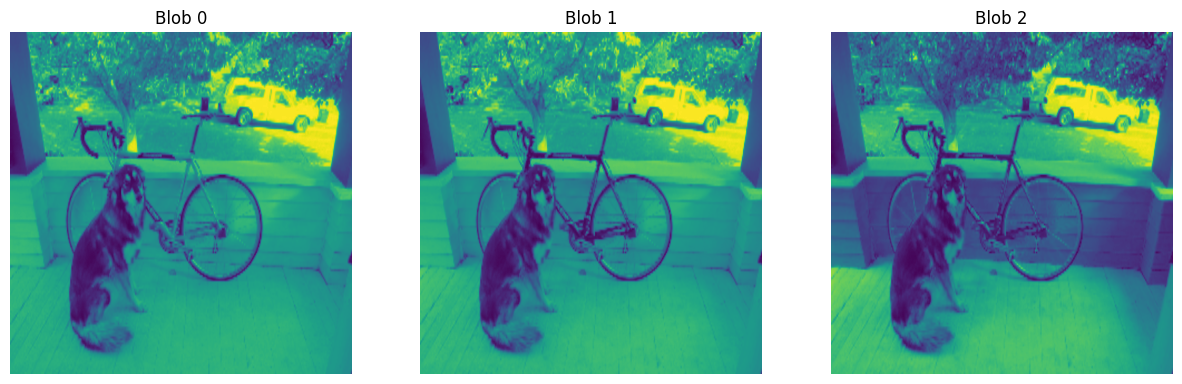

In [8]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for b in blob:
    for n, img_blob in enumerate(b):
        ax[n].set_title(f'Blob {n}')
        ax[n].imshow(img_blob)
        ax[n].axis('off')
plt.show()

In [9]:
net.setInput(blob)
outs = net.forward(output_layers)[0][0]
outs[1]

array([1.3368935e+01, 4.1004438e+00, 2.7174122e+01, 8.3370790e+00,
       3.1316861e-06, 1.6960335e-01, 6.0825334e-03, 8.0875672e-02,
       2.9916340e-03, 5.7070926e-03, 3.7997733e-03, 6.1724898e-03,
       9.8940739e-03, 1.9612335e-02, 3.3117142e-02, 1.4475087e-03,
       5.6557446e-03, 3.0691850e-03, 2.1792877e-02, 3.9578084e-02,
       3.3502581e-03, 3.7844416e-03, 4.5397910e-03, 6.9912975e-03,
       5.8561284e-03, 2.5316784e-03, 1.7815442e-03, 2.2248025e-03,
       2.5242693e-03, 1.0145510e-02, 3.6100719e-02, 1.0941238e-02,
       7.3280632e-03, 7.8853900e-03, 2.9615134e-03, 1.7163295e-02,
       4.2669335e-03, 1.1351660e-02, 1.0049859e-02, 2.9332682e-03,
       1.3953707e-03, 5.5245161e-03, 2.1007083e-02, 1.6100077e-03,
       1.0945031e-02, 4.4984799e-03, 1.3289029e-02, 2.7149210e-03,
       5.1330323e-03, 2.5713255e-03, 4.3945704e-03, 4.1196388e-03,
       2.2368899e-03, 5.8080925e-04, 3.1834748e-03, 1.3996529e-03,
       2.8510357e-03, 8.4846909e-04, 1.6210766e-03, 2.0460968e

In [10]:
class_ids=[]
confidences=[]
boxes=[]

x_factor = width / 640
y_factor = height / 640

for detection in outs:
    scores = detection[5:]
    class_id = np.argmax(scores)
    confidence = scores[class_id]
    if detection[4] > 0.198 and confidence > 0.8:
        # object detected
        center_x = int(detection[0] * x_factor)
        center_y = int(detection[1] * y_factor)
        w = int(detection[2] * x_factor)
        h = int(detection[3] * y_factor)
        # rectangle co-ordinaters
        x = int(center_x - w / 2)
        y = int(center_y - h / 2)
        
        boxes.append([x, y, w, h])  # put all rectangle areas
        confidences.append(float(confidence)) 
        # how confidence was that object detected and show that percentage
        class_ids.append(class_id)  # name of the object tha was detected

indexes = cv.dnn.NMSBoxes(boxes, confidences, 0.4, 0.6)

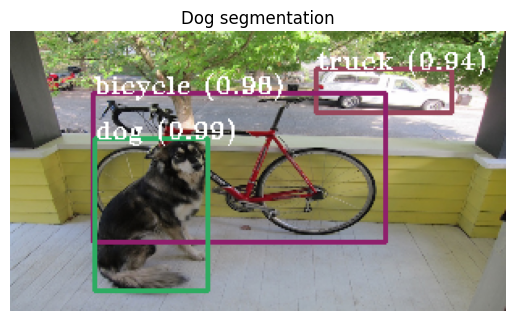

In [11]:
for i in range(len(boxes)):
    if i in indexes:
        x,y,w,h = boxes[i]
        label = classes[class_ids[i]]
        color = colors[i]
        cv.rectangle(img, (x,y), (x + w, y + h), color, 2)
        cv.putText(img,  
           label + f' ({confidences[i]:.2f})',  
           (x, y),  
           fontFace=cv.FONT_HERSHEY_TRIPLEX,  
           fontScale=0.5,  
           color=(255, 255, 255)
        )

plt.figure()
plt.title('Dog segmentation')
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()